# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Anissa Shanniyah Aprilia]
- **Email:** [anissaaca1204@gmail.com]
- **ID Dicoding:** [anissa_shanniyah]

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?
- Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?
- Bagaimana kondisi penggunaan sepeda pada workingday, weekday/weekend, dan holiday?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

### Gathering Data

Pada tahap ini, kita mengumpulkan data yang akan digunakan untuk analisis. Terdapat 3 dataset yang disediakan, tetapi yang saya pilih adalah **Bike Sharing Dataset**, yang berisi informasi mengenai jumlah penyewaan sepeda berdasarkan faktor lingkungan dan musim.

####Memuat dan Menampilkan Tabel hour



In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


####Memuat dan Menampilkan Tabel day

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Kita sudah berhasil memuat semua data

### Assessing Data

####Menilai Data hour_df




1. Memeriksa tipe data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Memeriksa missing values

In [5]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Memeriksa duplikasi data

In [6]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Memeriksa parameter statistik

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


####Menilai Data day_df




1. Memeriksa tipe data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Memeriksa missing values

In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


3. Memeriksa duplikasi data

In [10]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Memeriksa parameter statistik

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat 1 tipe data pada tabel hour_df dan day_df berdasarkan kolomnya yang tidak sesuai
- Tidak ada missing values pada kedua tabel
- Tidak ada duplikasi data pada kedua tabel
- Tidak terdapat keanehan pada kedua tabel

### Cleaning Data

####1. Menghapus tabel yang tidak dibutuhkan

Mengacu pada pertanyaan bisnis yang sudah ditentukan, tabel **hour_df** tidak relevan. Juga tabel hour_df dan day_df hanya terdapat perbedaan pada kolom hr, selain itu kolom dari kedua tabel ini sama.

In [12]:
del hour_df

####2. Menghapus kolom-kolom yang tidak akan digunakan

Mengacu pada pertanyaan bisnis yang sudah ditentukan sebelumya, maka terdapat 2 kolom yang akan dihapus/didrop, yaitu:
- instant: Karena kolom ini tidak memberikan informasi tambahan yang berguna
- windspeed: Tidak ada pertanyaan bisnis yang berhubungan dengan pengaruh kecepatan angin terhadap jumlah penyewaan sepeda

In [13]:
drop_col = ['instant', 'windspeed']

for x in day_df.columns:
  if x in drop_col:
    day_df.drop(labels=x, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


####3. Mengubah beberapa detail dari kolom

Nama-nama kolom, serta tipe data yang sudah ada pada tabel sedikit susah untuk saya baca dan pahami, maka saya akan mengubah dan menyesuaikannya agar lebih mudah untuk dibaca dan dipahami

In [14]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count'
}, inplace=True)

In [15]:
# Mengubah angka bulan menjadi nama bulan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Mengubah angka musim menjadi nama musim
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Mengubah angka hari menjadi nama hari
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# Mengubah angka kondisi cuaca menjadi deskripsi kondisi cuaca
day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Fog'
})

In [16]:
# Mengubah tipe data kolom date ke datetime
day_df['date'] = pd.to_datetime(day_df.date)

# Mengubah tipe data ke kategorikal
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
dtypes: categor

**Insight:**
- Kita sudah menyingkirkan tabel serta kolom yang tidak diperlukan untuk melanjutkan tahapan analisis dataset Bike Sharing ini
- Kita juga sudah mengubah detail-detail pada kolom yang sudah tersedia, sehingga datanya lebih mudah untuk dibaca dan dipahami

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

### 1. Mengelompokkan penyewa sepeda berdasarkan kondisi cuaca

In [18]:
day_df.groupby(by='weather_situation').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-b37addcb2353>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_situation').agg({


count                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Cloudy               8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

### 2. Mengelompokkan penyewa sepeda berdasarkan workingday

In [19]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-19-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

### 3. Mengelompokkan penyewa sepeda berdasarkan holiday


In [20]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-20-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

### 4. Membandingkan penyewa sepeda saat weekday dan weekend

In [21]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-21-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

### 5. Mengelompokkan penyewa sepeda berdasarkan season

In [22]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-22-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

**Insight:**
- Para penyewa sepeda lebih cenderung menyewa ketika cuaca sedang cerah atau mendung. Sedangkan ketika salju turun sangat sedikit yang menyewa sepeda, terlebih lagi ketika cuaca sedang sangat buruk tidak yang menyewa sepeda.
- Jumlah penyewaan sepeda lebih tinggi pada saat hari kerja dibandingkan dengan hari saat sedang tidak kerja.
- Para penyewa sepeda lebih suka menyewa sepeda saat hari biasa, dibandingkan hari libur.
- Jumlah penyewa sepeda pada hari Jumat memiliki jumlah penyewa terbanyak, dan hari Minggu memiliki jumlah penyewa sepeda yang paling sedikit
- Para penyewa sepeda sangat menyukai Musim Gugur (Fall) untuk menyewa sepeda. Sedangkan pada Musim Semi (Spring) sangat sedikit sepeda yang disewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

<ipython-input-23-c53a3383ff55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


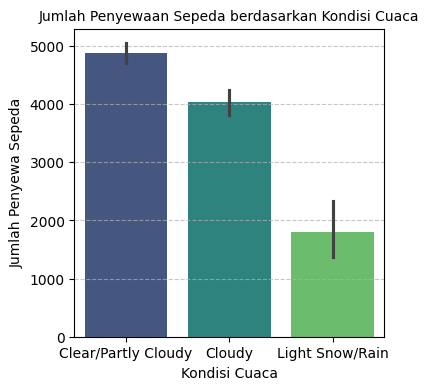

In [23]:
plt.figure(figsize=(4,4))
sns.barplot(
    x='weather_situation',
    y='count',
    data=day_df,
    palette='viridis'
)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=10)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 2: Apakah musim berpengaruh terhadap jumlah penyewaan sepeda?

<ipython-input-24-817e1baf63fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


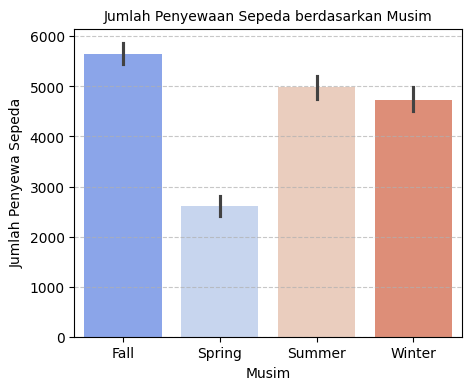

In [24]:
plt.figure(figsize=(5, 4))

sns.barplot(
    x='season',
    y='count',
    data=day_df,
    palette='coolwarm'
)

plt.xlabel('Musim', fontsize=10)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=10)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 3:  Bagaimana kondisi penggunaan sepeda pada workingday, weekday/weekend dan holiday?

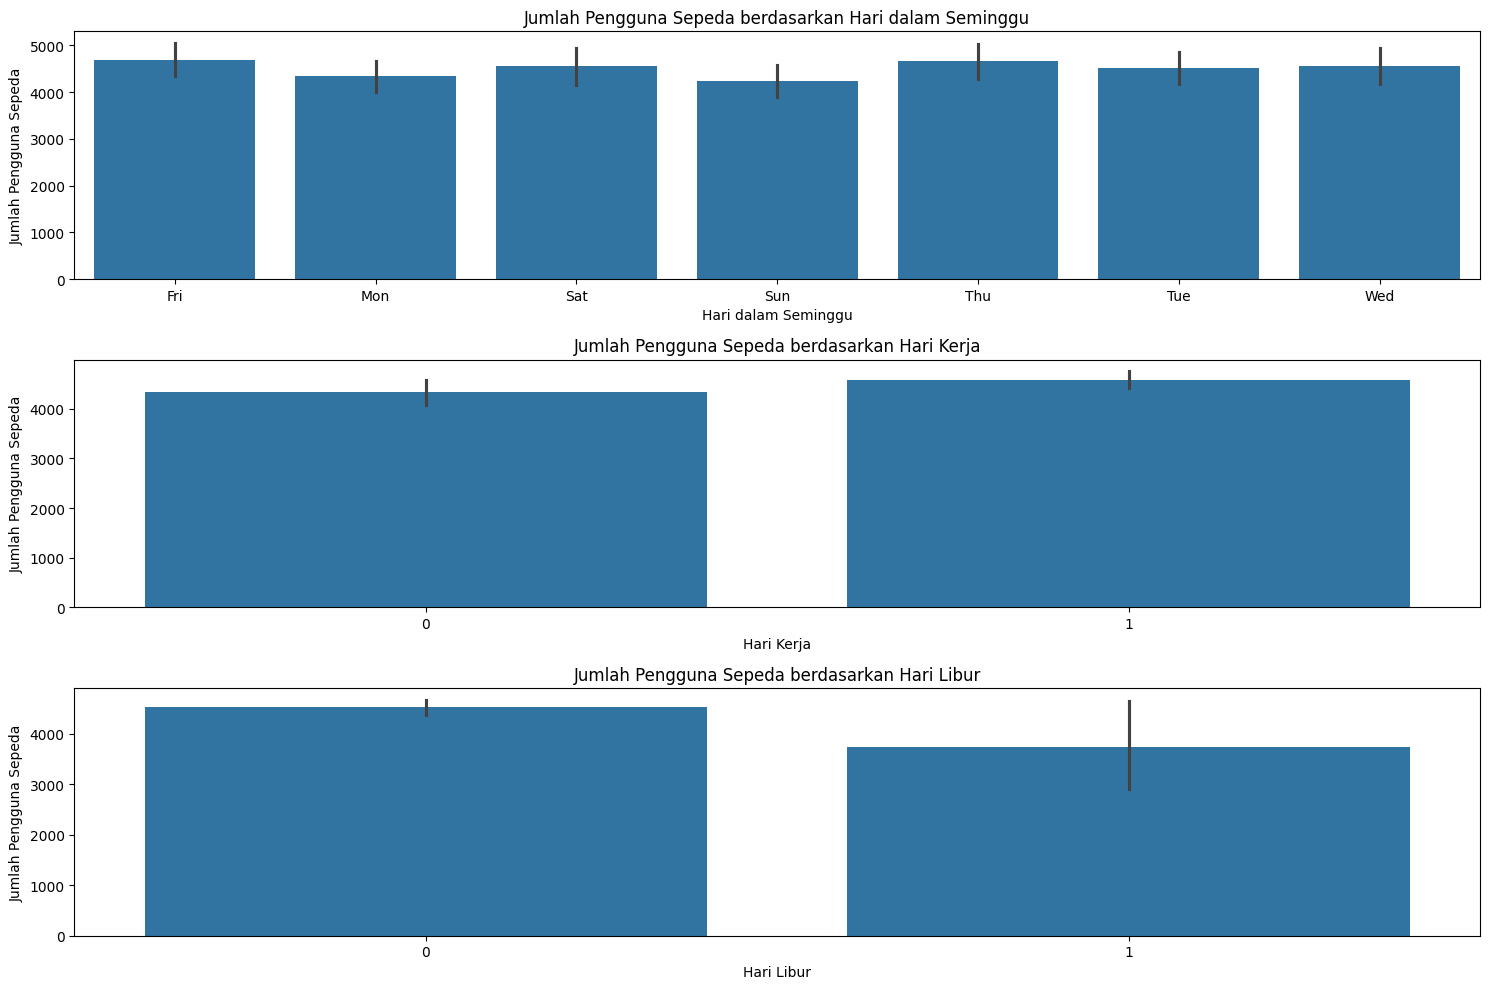

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[0].set_xlabel('Hari dalam Seminggu')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[1].set_xlabel('Hari Kerja')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[2].set_xlabel('Hari Libur')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

In [26]:
day_df.to_csv("day_data.csv", index=False)

**Insight:**
- Berdasarkan visualisasi data dengan menggunakan barplot pada **Pertanyaan 1**, terlihat jelas bahwa kondisi cuaca sangat berpengaruh terhadap jumlah penyewa sepeda. Kondisi cuaca clear/partly cloudy menjadi kondisi cuaca yang paling disukai para penyewa sepeda, diikuti oleh kondisi cuaca cloudy, sementara kondisi cuaca light snow/rain cenderung memiliki jumlah penyewa sepeda yang lebih rendah.

- Berdasarkan visualisasi data menggunakan barplot pada **Pertanyaan 2**, musim sangat berpengaruh terhadap jumlah penyewaan sepeda. Musim gugur (Fall) memiliki penyewaan tertinggi, diikuti dengan musim panas (Summer) dan musim dingin (Winter) yang relatif stabil, dan musim semi (Spring) memiliki penyewaan terendah.

- Berdasarkan visualisasi data dengan menggunakan barplot pada **Pertanyaan 3**, terlihat bahwa jumlah penyewa sepeda pada hari Jumat memiliki jumlah penyewa terbanyak, dan hari Minggu memiliki jumlah penyewa sepeda yang paling sedikit. Sementara itu, jumlah penyewa sepeda sedikit lebih tinggi pada hari kerja daripada akhir pekan. 0 menunjukkan akhir pekan dan 1 menunjukkan hari kerja. Terakhir, jumlah penyewa sepeda jauh lebih tinggi pada hari biasa dibandingkan hari libur.

## Conclusion

- Conclution pertanyaan 1: Cuaca sangat berpengaruh terhadap jumlah penyewaan sepeda. Dari visualisasi datanya, dapat dilihat bahwa penyewaan tertinggi terjadi saat kondisi cuaca Clear/Partly Cloudy dengan sekitar 5000 penyewa dan menurun sedikit saat kondisi cuaca Cloudy dengan sekitar 4000 penyewa. Tetapi, ketika kondisi cuaca memburuk seperti Light Snow/Rain, jumlah penyewa turun drastis menjadi sekitar 2000 penyewa. Yang menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca cerah dibandingkan saat hujan atau bersalju.


- Conclution pertanyaan 2: Dapat disimpulkan bahwa musim berpengaruh terhadap jumlah penyewaan sepeda. Terlihat bahwa musim gugur (Fall) menunjukkan jumlah penyewaan sepeda tertinggi, yang menunjukkan preferensi atau kebutuhan yang lebih besar pada musim tersebut, sementara musim semi (Spring) memiliki jumlah penyewaan terendah, menunjukkan adanya faktor-faktor musiman yang signifikan sehingga mempengaruhi penyewaan. Musim panas (Summer) dan musim dingin (Winter) menunjukkan jumlah penyewaan yang relatif stabil, walaupun tidak setinggi musim gugur.

- Conclution pertanyaan 3: Pada working day, jumlah penyewa sepeda sedikit lebih tinggi dibandingkan hari saat sedang tidak kerja, dengan kedua kategori memiliki jumlah penyewa di atas 4000. Sedangkan, pada hari biasa (tidak libur), jumlah penyewa sepeda secara signifikan lebih banyak daripada hari libur, menunjukkan preferensi penyewa sepeda lebih tinggi pada hari biasa daripada hari libur. Sementara itu, analisis harian menunjukkan bahwa hari Jumat memiliki rata-rata penyewa sepeda tertinggi, sementara hari Minggu memiliki rata-rata penyewa sepeda terendah.